In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

# Modeling Exercises
##### Exercise 1: Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


##### Choosing features other than the ones used in the lesson.

I'm going to create two new features called sepal_area and petal_area and see if I can cluster off of those.

In [3]:
df['sepal_area'] = (df['Sepal.Length']) * (df['Sepal.Width'])
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,sepal_area
1,5.1,3.5,1.4,0.2,setosa,17.85
2,4.9,3.0,1.4,0.2,setosa,14.70
3,4.7,3.2,1.3,0.2,setosa,15.04
4,4.6,3.1,1.5,0.2,setosa,14.26
5,5.0,3.6,1.4,0.2,setosa,18.00


In [4]:
df['petal_area'] = (df['Petal.Length']) * (df['Petal.Width'])
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,sepal_area,petal_area
1,5.1,3.5,1.4,0.2,setosa,17.85,0.28
2,4.9,3.0,1.4,0.2,setosa,14.70,0.28
3,4.7,3.2,1.3,0.2,setosa,15.04,0.26
4,4.6,3.1,1.5,0.2,setosa,14.26,0.30
5,5.0,3.6,1.4,0.2,setosa,18.00,0.28


In [5]:
X = df[['sepal_area', 'petal_area']]

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [7]:
df['clusters_by_area'] = kmeans.predict(X)

Visualizing the original data, the original data with actual species, and the new clusters

Text(0.5, 1.0, 'K-Means Clusters')

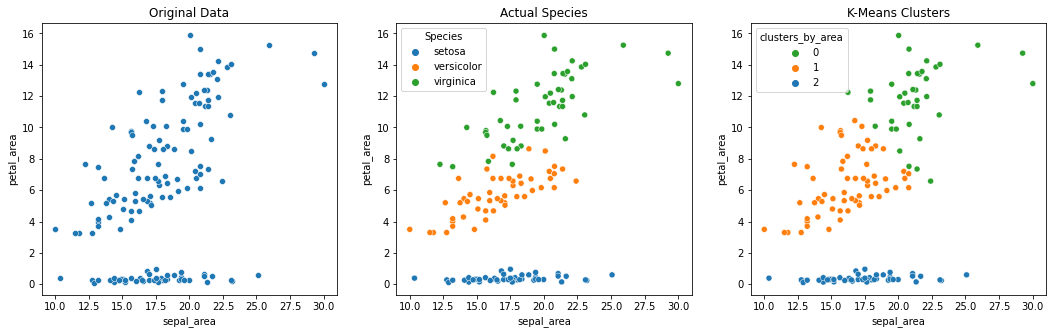

In [8]:
plt.figure(figsize=(18,5))
plt.subplot(131)
sns.scatterplot(data = df, x = 'sepal_area', y = 'petal_area')
plt.title('Original Data')

plt.subplot(132)
sns.scatterplot(data = df, x = 'sepal_area', y = 'petal_area', hue = 'Species')
plt.title('Actual Species')

plt.subplot(133)
sns.scatterplot(data = df, x = 'sepal_area', y = 'petal_area', hue = 'clusters_by_area', palette= ['#2ca02c', '#ff7f0e', '#1f77b4'])
plt.title('K-Means Clusters')

Decent, need to visualize the elbow statistics.

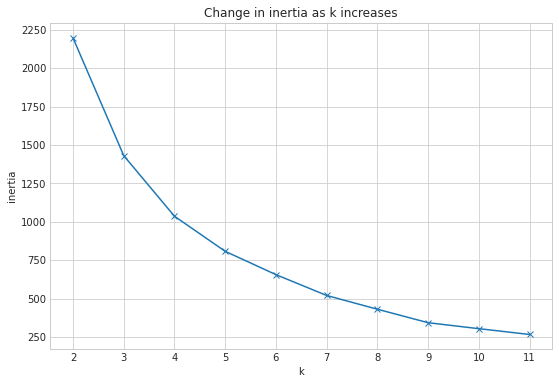

In [9]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

It looks like the curve is pretty gradual, but the two biggest drops are from 2 to 3 and 3 to 4. I'd go with 4 probably from looking at this graph

Repeating now with 3 different features.

I'm going to use my previously made features with another one called petal_sepal_width which is the petal width / sepal width.

In [10]:
df['petal_sepal_width'] = (df['Petal.Width']) / (df['Sepal.Width'])
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,sepal_area,petal_area,clusters_by_area,petal_sepal_width
1,5.1,3.5,1.4,0.2,setosa,17.85,0.28,2,0.057143
2,4.9,3.0,1.4,0.2,setosa,14.70,0.28,2,0.066667
3,4.7,3.2,1.3,0.2,setosa,15.04,0.26,2,0.062500
4,4.6,3.1,1.5,0.2,setosa,14.26,0.30,2,0.064516
5,5.0,3.6,1.4,0.2,setosa,18.00,0.28,2,0.055556


In [11]:
X = df[['sepal_area', 'petal_area', 'petal_sepal_width']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [12]:
df['new_clusters'] = kmeans.predict(X)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,sepal_area,petal_area,clusters_by_area,petal_sepal_width,new_clusters
1,5.1,3.5,1.4,0.2,setosa,17.85,0.28,2,0.057143,0
2,4.9,3.0,1.4,0.2,setosa,14.70,0.28,2,0.066667,0
3,4.7,3.2,1.3,0.2,setosa,15.04,0.26,2,0.062500,0
4,4.6,3.1,1.5,0.2,setosa,14.26,0.30,2,0.064516,0
5,5.0,3.6,1.4,0.2,setosa,18.00,0.28,2,0.055556,0


Visualizing the data against the previous clusters and actual data

Text(0.5, 1.0, 'New K-Means Clusters')

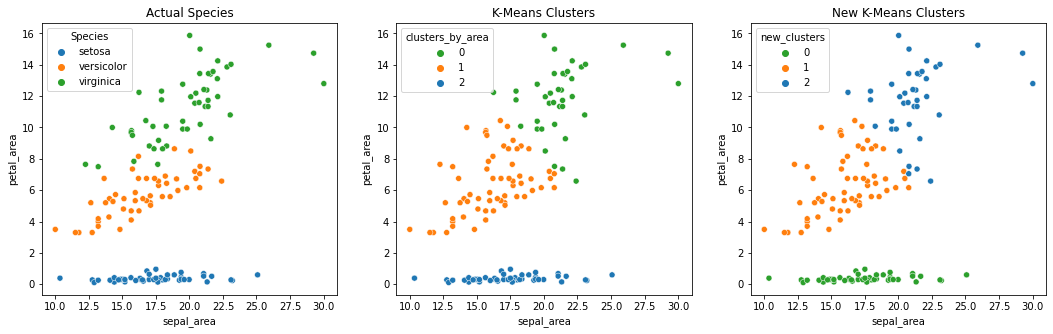

In [13]:
plt.figure(figsize=(18,5))

plt.subplot(131)
sns.scatterplot(data = df, x = 'sepal_area', y = 'petal_area', hue = 'Species')
plt.title('Actual Species')

plt.subplot(132)
sns.scatterplot(data = df, x = 'sepal_area', y = 'petal_area', hue = 'clusters_by_area', palette= ['#2ca02c', '#ff7f0e', '#1f77b4'])
plt.title('K-Means Clusters')

plt.subplot(133)
sns.scatterplot(data = df, x = 'sepal_area', y = 'petal_area', hue = 'new_clusters', palette= ['#2ca02c', '#ff7f0e', '#1f77b4'])
plt.title('New K-Means Clusters')

It looks almost the same with a single point being different

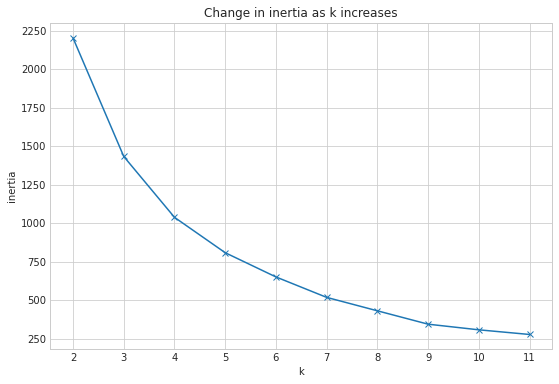

In [14]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

Again, this looks essentially the same as the model from above.

##### Exercise 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [15]:
import wrangle_mall

In [16]:
df = wrangle_mall.get_mall()

In [17]:
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [18]:
scaled = wrangle_mall.wrangle(df)

In [19]:
scaled.head()

,age,annual_income,spending_score,gender_Male
customer_id,,,,
1,0.019231,0.000000,0.387755,1.0
2,0.057692,0.000000,0.816327,1.0
3,0.038462,0.008197,0.051020,0.0
4,0.096154,0.008197,0.775510,0.0
5,0.250000,0.016393,0.397959,0.0


In [20]:
def spending_cat(df):
    if (df['spending_score'] >= 0) & (df['spending_score'] <= .333):
        return 'low'
    elif (df['spending_score'] > .333) & (df['spending_score'] <= .667):
        return 'medium'
    else:
        return 'high'


In [21]:
scaled['spending_category'] = scaled.apply(spending_cat, axis=1)
scaled.head()

,age,annual_income,spending_score,gender_Male,spending_category
customer_id,,,,,
1,0.019231,0.000000,0.387755,1.0,medium
2,0.057692,0.000000,0.816327,1.0,high
3,0.038462,0.008197,0.051020,0.0,low
4,0.096154,0.008197,0.775510,0.0,high
5,0.250000,0.016393,0.397959,0.0,medium


In [22]:
X = scaled[['age', 'annual_income', 'gender_Male']]

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0,
       1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

In [24]:
scaled['clusters'] = kmeans.predict(X)

Text(0.5, 1.0, 'K-Means Clusters')

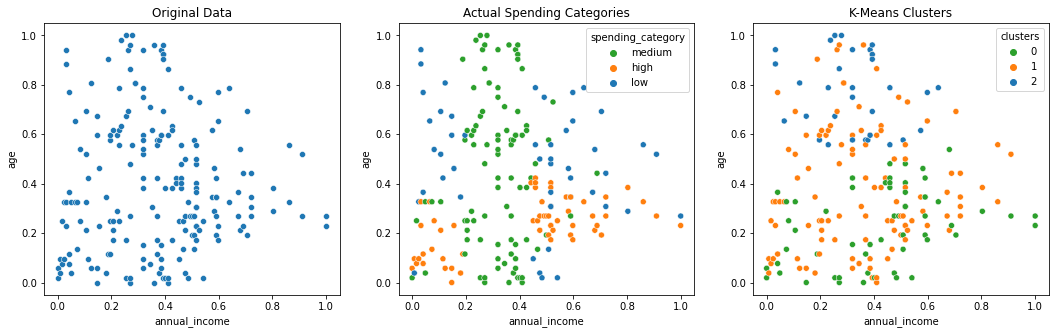

In [25]:
plt.figure(figsize=(18,5))

plt.subplot(131)
sns.scatterplot(data = scaled, x = 'annual_income', y = 'age')
plt.title('Original Data')

plt.subplot(132)
sns.scatterplot(data = scaled, x = 'annual_income', y = 'age', hue = 'spending_category', palette= ['#2ca02c', '#ff7f0e', '#1f77b4'])
plt.title('Actual Spending Categories')

plt.subplot(133)
sns.scatterplot(data = scaled, x = 'annual_income', y = 'age', hue = 'clusters', palette= ['#2ca02c', '#ff7f0e', '#1f77b4'])
plt.title('K-Means Clusters')

The K-Means clusters don't looking that accurate

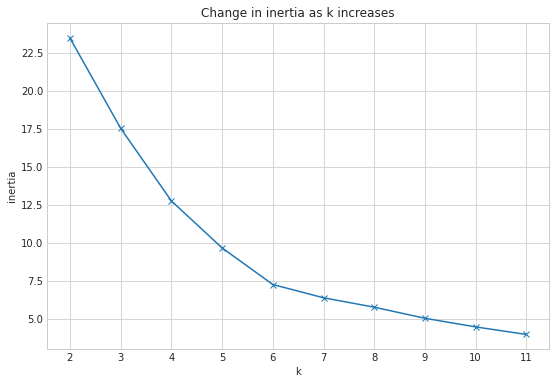

In [26]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

This curve indicates, I might be better served if I were to use a k of 5 or 6. I will recalculate the spending categories based on five groups and rerun the model using a k of 5 .

In [27]:
def spending_cat_redux(df):
    if (df['spending_score'] >= 0) & (df['spending_score'] <= .2):
        return 'low'
    elif (df['spending_score'] > .2) & (df['spending_score'] <= .4):
        return 'medium_low'
    elif (df['spending_score'] > .4) & (df['spending_score'] <= .6):
        return 'medium'
    elif (df['spending_score'] > .6) & (df['spending_score'] <= .8):
        return 'medium_high'
    else:
        return 'high'


In [28]:
scaled['spending_category'] = scaled.apply(spending_cat_redux, axis=1)
scaled.head()

,age,annual_income,spending_score,gender_Male,spending_category,clusters
customer_id,,,,,,
1,0.019231,0.000000,0.387755,1.0,medium_low,0
2,0.057692,0.000000,0.816327,1.0,high,0
3,0.038462,0.008197,0.051020,0.0,low,1
4,0.096154,0.008197,0.775510,0.0,medium_high,1
5,0.250000,0.016393,0.397959,0.0,medium_low,1


In [29]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 4, 0, 1, 1, 0, 1, 3, 0, 1, 1,
       4, 1, 4, 1, 4, 1, 0, 0, 3, 0, 3, 1, 4, 0, 4, 0, 0, 0, 4, 1, 3, 0,
       4, 0, 4, 0, 0, 0, 4, 1, 0, 3, 4, 3, 4, 3, 0, 3, 3, 1, 4, 4, 3, 1,
       4, 4, 1, 0, 3, 4, 4, 4, 3, 1, 4, 1, 0, 4, 3, 1, 3, 4, 0, 3, 4, 0,
       0, 4, 4, 1, 3, 2, 0, 1, 4, 0, 3, 1, 0, 4, 3, 1, 3, 0, 4, 3, 3, 3,
       3, 0, 2, 1, 0, 0, 4, 4, 4, 4, 1, 2, 2, 1, 0, 2, 1, 1, 3, 1, 3, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 4, 1, 2, 2, 1, 1, 3, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 4, 2, 1, 2, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 4, 2,
       3, 1, 3, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 1])

In [30]:
scaled['clusters'] = kmeans.predict(X)

Replotting with 5 clusters to see how it performs now.

Text(0.5, 1.0, 'K-Means Clusters')

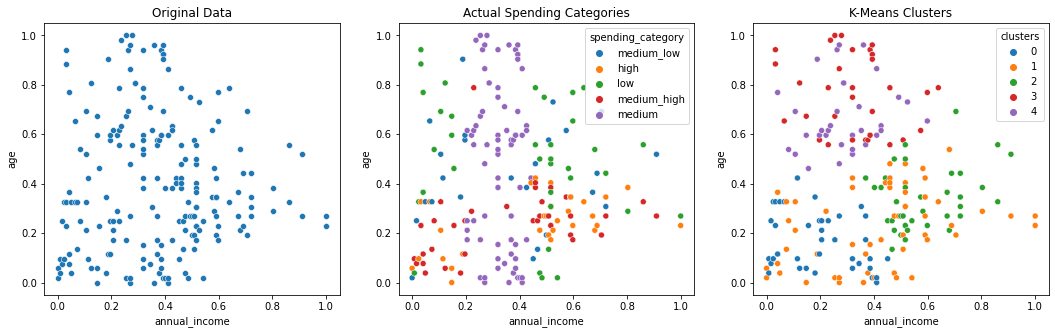

In [31]:
plt.figure(figsize=(18,5))

plt.subplot(131)
sns.scatterplot(data = scaled, x = 'annual_income', y = 'age')
plt.title('Original Data')

plt.subplot(132)
sns.scatterplot(data = scaled, x = 'annual_income', y = 'age', hue = 'spending_category')
plt.title('Actual Spending Categories')

plt.subplot(133)
sns.scatterplot(data = scaled, x = 'annual_income', y = 'age', hue = 'clusters', palette= ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('K-Means Clusters')

Not great results.

Going to rerun this but using the spending_score data to see how it affects clustering.

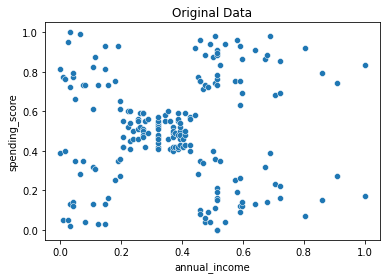

In [32]:
# When plotting for just annual_income and spending_score we see there are five distinct groups.

sns.scatterplot(data = scaled, x = 'annual_income', y = 'spending_score')
plt.title('Original Data')
plt.show()

Because of the distinct (to my eye) groups I'm just going to cluster by these two categories using k of 5.

In [33]:
X = scaled[[ 'annual_income','spending_score']]

In [34]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0,
       1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [35]:
scaled['clusters'] = kmeans.predict(X)

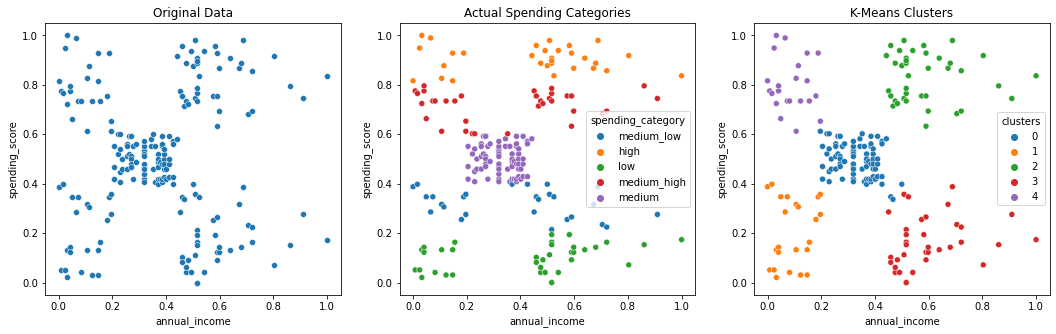

In [36]:
plt.figure(figsize=(18,5))

plt.subplot(131)
sns.scatterplot(data = scaled, x = 'annual_income', y = 'spending_score')
plt.title('Original Data')

plt.subplot(132)
sns.scatterplot(data = scaled, x = 'annual_income', y = 'spending_score', hue = 'spending_category')
plt.title('Actual Spending Categories')

plt.subplot(133)
sns.scatterplot(data = scaled, x = 'annual_income', y = 'spending_score', hue = 'clusters', palette= ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('K-Means Clusters')
plt.show()

This works decently and gets the broad strokes of the clusters but still misses a good portion.

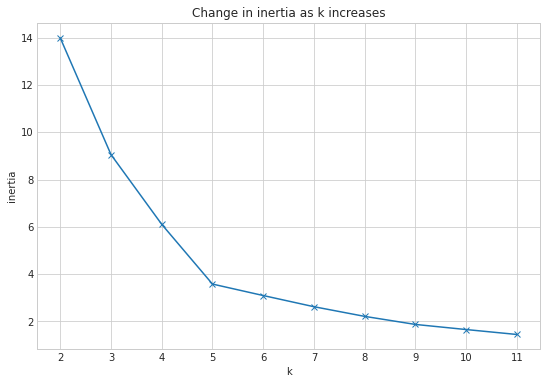

In [37]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

This inertia graph seems to confirm that the best number of groupings is in fact 5 when taking just annual_income and spending_score into account.

##### Exercise 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing

b) Visualize the data and guess the number and shape of the clusters.

c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

d) Repeat the step above but with scaled data.

e) Write down the takeaways from this exercise.

In [38]:
# a) Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
                         
df = pd.read_csv('bonus_data')
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


b) Visualize the data and guess the number and shape of the clusters.

<AxesSubplot:xlabel='x', ylabel='y'>

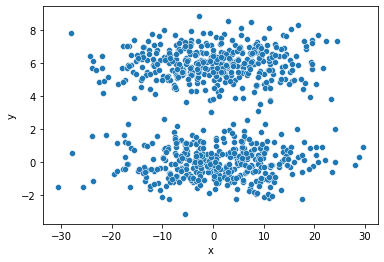

In [39]:
sns.scatterplot(data = df, x = 'x', y = 'y')

A simple observation of this data makes it appear as two discrete clusters of about the same size and shape.

c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

In [40]:
X = df[['x', 'y']]

In [41]:
# Making, fitting and predicting from the model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

df['clusters'] = kmeans.predict(X)

In [42]:
df.head()

,x,y,clusters
0,-3.641747,0.121540,0
1,-7.620447,1.810897,0
2,-6.505373,0.068072,0
3,7.730963,0.585521,1
4,17.283668,0.344804,1


Text(0.5, 1.0, 'K-Means clusters')

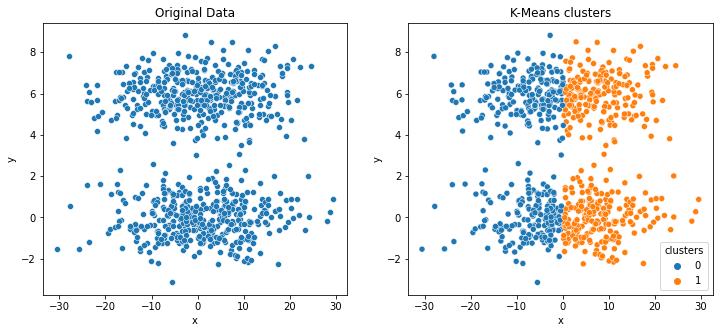

In [43]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.scatterplot(data = df, x = 'x', y = 'y')
plt.title('Original Data')

plt.subplot(122)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'clusters')
plt.title('K-Means clusters')

Clearly my prediction didn't work out as suspected...

d) Repeat the step above but with scaled data.

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaled = pd.read_csv('bonus_data')

In [46]:
scaler = MinMaxScaler()

In [47]:
scaled[['x_scaled', 'y_scaled']] = scaler.fit_transform(scaled)

In [48]:
scaled.head()

,x,y,x_scaled,y_scaled
0,-3.641747,0.121540,0.448379,0.273145
1,-7.620447,1.810897,0.382135,0.414353
2,-6.505373,0.068072,0.400701,0.268676
3,7.730963,0.585521,0.637730,0.311928
4,17.283668,0.344804,0.796779,0.291807


In [49]:
X = scaled[['x_scaled', 'y_scaled']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

scaled['scaled_clusters'] = kmeans.predict(X)

Text(0.5, 1.0, 'Scaled K-Means clusters')

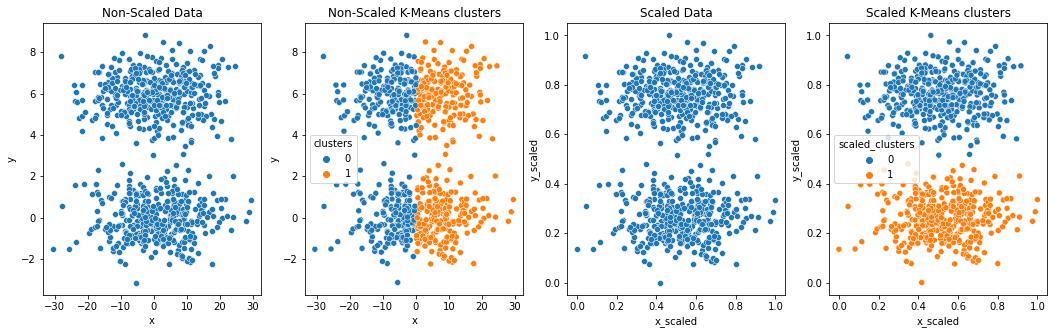

In [53]:
plt.figure(figsize=(18,5))

plt.subplot(141)
sns.scatterplot(data = df, x = 'x', y = 'y')
plt.title('Non-Scaled Data')

plt.subplot(142)
sns.scatterplot(data = df, x = 'x', y = 'y', hue = 'clusters')
plt.title('Non-Scaled K-Means clusters')

plt.subplot(143)
sns.scatterplot(data = scaled, x = 'x_scaled', y = 'y_scaled')
plt.title('Scaled Data')

plt.subplot(144)
sns.scatterplot(data = scaled, x = 'x_scaled', y = 'y_scaled', hue = 'scaled_clusters')
plt.title('Scaled K-Means clusters')

e) Write down the takeaways from this exercise.

When scaled the clusters show up appropriately. My guess is this is because originally the unscaled x values were spread further apart than the y and therefore it grouped them closer based on the smaller range of y values. In the scaled data, the cluseters show up how I would expect as they are closer than previously.